# Using a different time series dataset (either from FRED or elsewhere), go about the process of time series modeling. Specifically, generate the following deliverables:

In [1]:
!pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import scipy
import plotly.express as px
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import pacf, acf
from statsmodels.tsa.arima_model import ARIMA

import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
def ilinechart(df, x, y, groups=None, title=''):
    fig = px.line(df, x=x, y=y, color=groups, title=title, 
                  template='none').update(layout=dict(title=dict(x=0.5)))
    
    fig.show()

In [4]:
amazon = pd.read_csv('data/AMZN_data.csv')
amazon.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [7]:
amazon = yf.download('AMZN', start='2013-01-01',end='2020-04-05',interval='1d')

[*********************100%***********************]  1 of 1 downloaded


# Plot the time series, along with any logical or necessary differences to get a stationary dataset.

In [8]:
amazon['diff'] = amazon['Close'] - amazon['Close'].shift()
amazon = amazon.dropna()

# Generate and interpret a PACF for the time series (and/or its differences).

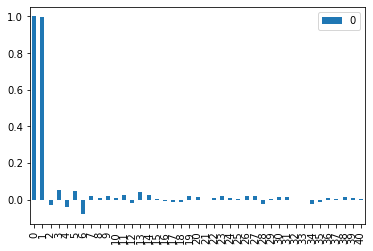

In [8]:
x_acf = pd.DataFrame(pacf(amazon['close']))
x_acf.plot(kind='bar')

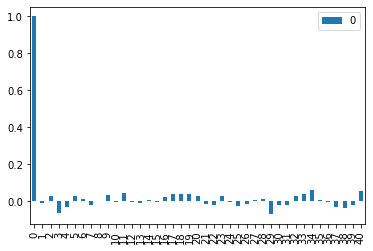

In [17]:
x_acf = pd.DataFrame(acf(amazon['close'].diff().dropna()))
x_acf.plot(kind='bar')

# Generate five ARIMA specifications and evaluate their efficacy at modeling your data.

In [9]:
model = ARIMA(amazon['Close'], order=(6,1,3))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1826
Model:                 ARIMA(6, 1, 3)   Log Likelihood               -8114.025
Method:                       css-mle   S.D. of innovations             20.586
Date:                Thu, 05 Nov 2020   AIC                          16250.049
Time:                        01:03:43   BIC                          16310.658
Sample:                             1   HQIC                         16272.406
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9065      0.368      2.465      0.014       0.186       1.627
ar.L1.D.Close    -0.6569      0.141     -4.672      0.000      -0.932      -0.381
ar.L2.D.Close     0.7156      0.105     

In [10]:
model = ARIMA(amazon['diff'], order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                   diff   No. Observations:                 1827
Model:                     ARMA(1, 1)   Log Likelihood               -8135.316
Method:                       css-mle   S.D. of innovations             20.778
Date:                Thu, 05 Nov 2020   AIC                          16278.632
Time:                        01:03:46   BIC                          16300.673
Sample:                             0   HQIC                         16286.762
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9066      0.453      1.999      0.046       0.018       1.795
ar.L1.diff    -0.2097      0.213     -0.987      0.324      -0.626       0.207
ma.L1.diff     0.1285      0.215      0.597      0.5

In [11]:
model = ARIMA(amazon['Close'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1826
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8131.327
Method:                       css-mle   S.D. of innovations             20.783
Date:                Thu, 05 Nov 2020   AIC                          16270.654
Time:                        01:03:50   BIC                          16292.693
Sample:                             1   HQIC                         16278.784
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9038      0.454      1.992      0.046       0.015       1.793
ar.L1.D.Close    -0.2099      0.213     -0.987      0.324      -0.627       0.207
ma.L1.D.Close     0.1286      0.215     

In [12]:
model = ARIMA(amazon['Close'], order=(5, 1, 5))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1826
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -8106.944
Method:                       css-mle   S.D. of innovations             20.480
Date:                Thu, 05 Nov 2020   AIC                          16237.887
Time:                        01:04:05   BIC                          16304.006
Sample:                             1   HQIC                         16262.276
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9038      0.457      1.976      0.048       0.007       1.800
ar.L1.D.Close    -1.4669      0.107    -13.670      0.000      -1.677      -1.257
ar.L2.D.Close    -0.3571      0.092     

In [13]:
model = ARIMA(amazon['Close'], order=(1, 2, 1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 1825
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -8131.142
Method:                       css-mle   S.D. of innovations             20.788
Date:                Thu, 05 Nov 2020   AIC                          16270.283
Time:                        01:04:06   BIC                          16292.321
Sample:                             2   HQIC                         16278.413
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0006      0.001      0.670      0.503      -0.001       0.002
ar.L1.D2.Close    -0.0815      0.023     -3.494      0.000      -0.127      -0.036
ma.L1.D2.Close    -1.0000      0.002

# Finally, choose one specification and make a case for it as a logical model for your dataset.

In [30]:
indx = amazon.set_index('date')
df = indx['close']
df

date
2013-02-11     257.21
2013-02-12     258.70
2013-02-13     269.47
2013-02-14     269.24
2013-02-15     265.09
               ...   
2018-02-01    1390.00
2018-02-02    1429.95
2018-02-05    1390.00
2018-02-06    1442.84
2018-02-07    1416.78
Name: close, Length: 1258, dtype: float64

In [14]:
split_date='2017-02-01'
train_df=amazon['Close'][:split_date]
train_df

Date
2013-01-02    257.31
2013-01-03    258.48
2013-01-04    259.15
2013-01-07    268.46
2013-01-08    266.38
               ...  
2017-01-26    839.15
2017-01-27    835.77
2017-01-30    830.38
2017-01-31    823.48
2017-02-01    832.35
Name: Close, Length: 1029, dtype: float64

In [15]:
test_df = amazon['Close'][split_date:]
test_df

Date
2017-02-01     832.35
2017-02-02     839.95
2017-02-03     810.20
2017-02-06     807.64
2017-02-07     812.50
               ...   
2020-03-30    1963.95
2020-03-31    1949.72
2020-04-01    1907.70
2020-04-02    1918.83
2020-04-03    1906.59
Name: Close, Length: 799, dtype: float64

Text(0.5, 1.0, 'Histogram of Residuals')

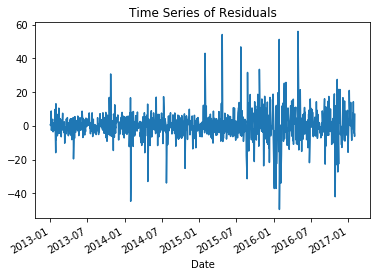

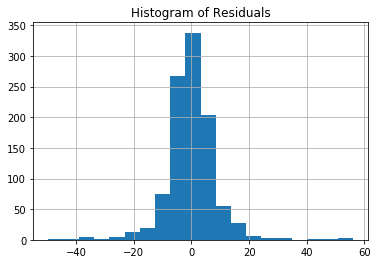

In [16]:
model = ARIMA(train_df, order=(6, 1, 3))
model_fit = model.fit()

residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

In [45]:
len(test_df)

257

In [ ]:
arma_predictions_fb= arma_fitted_fb.predict(start=len(fcb_close[:-50]), 
                                   end=len(fcb_close[:-50])+len(fcb_close[-50:])-1,dynamic=False)

In [24]:
model_fit.predict(start=len(train_df), 
              end=len(train_df)+len(test_df)-1,dynamic=False)


1028    0.829844
1029    0.532677
1030    0.471597
1031    0.925025
1032   -0.025621
          ...   
1822    0.562136
1823    0.557856
1824    0.557315
1825    0.561764
1826    0.560405
Length: 799, dtype: float64